In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Импорты

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [3]:
path = '/content/drive/MyDrive/Хакатон_2/Проектный практикум (хакатон)/'

In [4]:
SESSION_FILE_PATH = path + 'ga_sessions.csv'
HITS_FILE_PATH = path + 'ga_hits.csv'

FULL_FILE_PATH = path + 'df_with_target.csv'
TARGET_FILE_PATH = path + 'target_data.csv'

FINISH_FILE_PATH = path + 'sessions_cleared.csv'

 # Вспомогательные функции

### Функция загрузки и проверки датафрейма

In [6]:
def load_clean_describe(path_file):
    # Загрузка файла
    df = pd.read_csv(path_file, sep=',')

    # Проверяем и удаляем дубликаты
    if df.duplicated().any():
        print(f'Удалено дубликатов: {df.duplicated().sum()}')
        df.drop_duplicates(inplace=True)
    else:
        print('Дубликаты не найдены.')

    # Процент пропусков по каждому столбцу
    print('\nПроцент пропусков по столбцам:')
    print((df.isnull().mean() * 100).round(2))

    # Общая статистика по всем столбцах
    print('\nОписание всех столбцов:')
    print(df.describe(include='all'))

    return df

### Функция группировки датафрейма по определенной колонке

Функция группирует данные по указанной колонке и собиракт все значения из остальных колонок в виде списков.

In [ ]:
def group_by_column_with_lists(df, column_name):
    """
    Группирует DataFrame по указанной колонке и собирает все значения в остальных колонках в виде списков.

    :param df: Исходный DataFrame
    :param column_name: Название колонки, по которой нужно группировать
    :return: Новый DataFrame, сгруппированный по указанной колонке с перечислением значений в виде списков
    """
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")

    # Группируем данные по указанной колонке и собираем значения в остальных колонках в списки
    grouped_df = df.groupby(column_name).agg(lambda x: list(x)).reset_index()

    return grouped_df

# Описание таблицы GA Hits (ga_hits.csv)

Одна строка = одно событие в рамках одного визита на сайт.

 Описание атрибутов:

    session_id — ID визита;
    hit_date — дата события;
    hit_time — время события;
    hit_number — порядковый номер события в рамках сессии;
    hit_type — тип события;
    hit_referer — источник события;
    hit_page_path — страница события;
    event_category — тип действия;
    event_action — действие;
    event_label — тег действия;
    event_value — значение результата действия

In [ ]:
data = load_clean_describe(HITS_FILE_PATH)

Дубликаты не найдены.

Процент пропусков по столбцам:
session_id          0.00
hit_date            0.00
hit_time           58.25
hit_number          0.00
hit_type            0.00
hit_referer        39.90
hit_page_path       0.00
event_category      0.00
event_action        0.00
event_label        23.91
event_value       100.00
dtype: float64

Описание всех столбцов:
                                       session_id    hit_date      hit_time  \
count                                    15726470    15726470  6.566148e+06   
unique                                    1734610         226           NaN   
top     5442565791571325612.1632449195.1632449195  2021-05-24           NaN   
freq                                          768      513035           NaN   
mean                                          NaN         NaN  2.091050e+05   
std                                           NaN         NaN  4.032110e+05   
min                                           NaN         NaN  0.000000e+00   

In [ ]:
data

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,810589.0,43,event,NaN,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,NaN,NaN
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,904927.0,40,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,NaN,NaN
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,2172865.0,43,event,NaN,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,NaN,NaN
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,713325.0,45,event,NaN,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,NaN,NaN


# Создание target для обучения

 Целевое действие — события типа «Оставить заявку» и «Заказать звонок»

In [ ]:
# Список целевых действий
target_action_list = ['sub_car_claim_click', 'sub_car_claim_submit_click',
                      'sub_open_dialog_click', 'sub_custom_question_submit_click',
                      'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
                      'sub_car_request_submit_click']

In [ ]:
# Добавляем бинарную колонку таргета
data['is_target_action'] = data['event_action'].apply(lambda x: 1 if x in target_action_list else 0)

In [ ]:
# Уникальных значений по таргету
data['is_target_action'].value_counts()

,count
is_target_action,
0,15621562
1,104908


In [ ]:
# Проверка дубликатов
data.duplicated().sum()

np.int64(0)

In [ ]:
# Создаем независимый датафрейм, где таргет = 1
target_data = data.loc[data['is_target_action'] == 1, ['is_target_action', 'session_id']].copy()

In [ ]:
# Проверка дубликатов
target_data.duplicated().sum()

np.int64(54148)

In [ ]:
#Удалить дубликаты
target_data = target_data.drop_duplicates(subset='session_id')

In [ ]:
target_data.duplicated().sum()

np.int64(0)

In [ ]:
target_data.shape

(50760, 2)

In [ ]:
# Сохраняем в  файл
target_data.to_csv(path + 'target_data.csv', index=False)

Итог: Получили файл, где из файла ga_hits.csv сохранены только строки, соответствующие целевым действиям, то есть с таргетом = 1.

In [ ]:
del data

# Описание таблицы GA Sessions (ga_sessions.csv)

 Одна строка = один визит на сайт.

 Описание атрибутов:

    session_id — ID визита;
    client_id — ID посетителя;
    visit_date — дата визита;
    visit_time — время визита;
    visit_number — порядковый номер визита клиента;
    utm_source — канал привлечения;
    utm_medium — тип привлечения;
    utm_campaign — рекламная кампания;
    utm_keyword — ключевое слово;
    device_category — тип устройства;
    device_os — ОС устройства;
    device_brand — марка устройства;
    device_model — модель устройства;
    device_screen_resolution — разрешение экрана;
    device_brand — марка устройства;
    device_model — модель устройства;
    device_screen_resolution — разрешение экрана;
    device_browser — браузер;
    geo_country — страна;
    geo_city — город

In [8]:
df = load_clean_describe(SESSION_FILE_PATH)

Дубликаты не найдены.

Процент пропусков по столбцам:
session_id                   0.00
client_id                    0.00
visit_date                   0.00
visit_time                   0.00
visit_number                 0.00
utm_source                   0.01
utm_medium                   0.00
utm_campaign                11.81
utm_adcontent               18.04
utm_keyword                 58.17
device_category              0.00
device_os                   57.53
device_brand                19.74
device_model                99.12
device_screen_resolution     0.00
device_browser               0.00
geo_country                  0.00
geo_city                     0.00
dtype: float64

Описание всех столбцов:
                                       session_id     client_id  visit_date  \
count                                     1860042  1.860042e+06     1860042   
unique                                    1860042  1.391717e+06         226   
top     9055430416266113553.1640968742.1640968742  1.7504

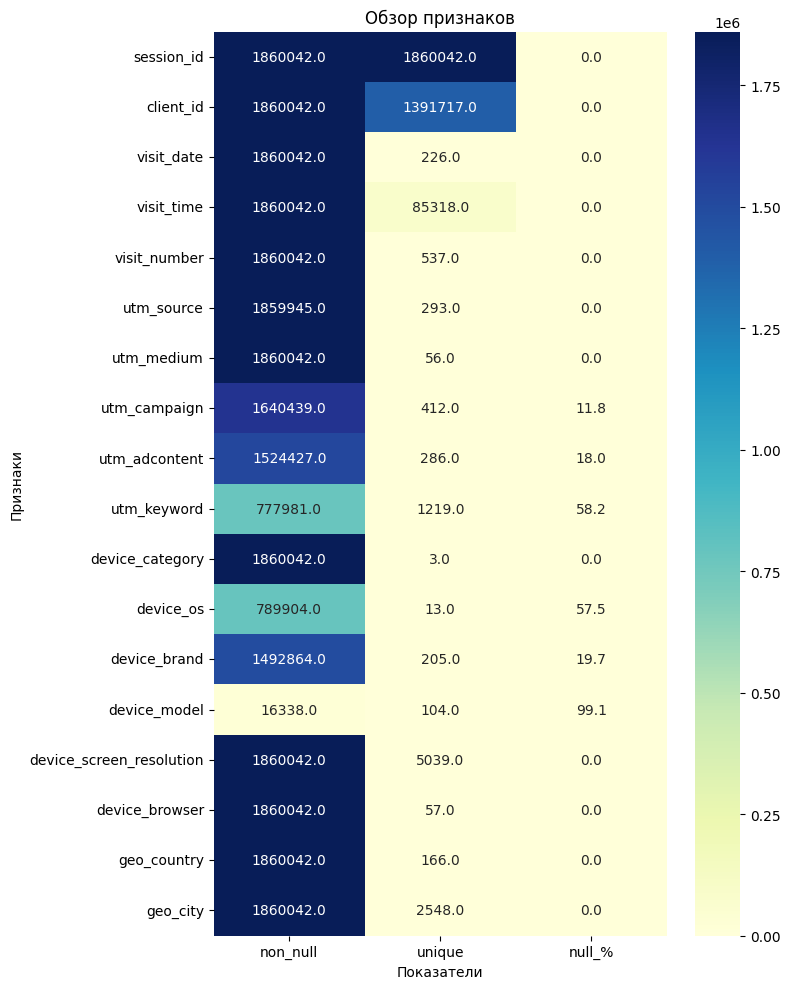

In [10]:
# Ваш датафрейм 'df'
short_desc = pd.DataFrame({
    'non_null': df.count(),
    'unique': df.nunique(),
    'null_%': (df.isnull().sum() / len(df) * 100).round(1)
})

plt.figure(figsize=(8, short_desc.shape[0] * 0.5 + 1))  # динамически подстраиваем высоту
sns.heatmap(short_desc, annot=True, fmt=".1f", cmap="YlGnBu", cbar=True)
plt.title('Обзор признаков')
plt.ylabel('Признаки')
plt.xlabel('Показатели')
plt.tight_layout()
plt.show()

## Добавляем target в датасет для обучения

In [ ]:
# Загрузка файла target_data.csv
target_data = pd.read_csv(TARGET_FILE_PATH)

In [ ]:
# Сколько строк из target_data действительно находят соответствия в df
count = target_data['session_id'].isin(df['session_id']).sum()
print(f'Совпадающих строк: {count}')

Совпадающих строк: 50314


In [ ]:
# Уникальных значений по таргету
target_data['is_target_action'].value_counts()

,count
is_target_action,
1,50760


In [ ]:
# Присоединяем колонку is_target_action к df по session_id
df = df.merge(
    target_data[['session_id', 'is_target_action']],
    on='session_id', how='left'
)

# Заменяем NaN (то есть там, где session_id не было в target_data) на 0
df['target'] = df['is_target_action'].fillna(0).astype(int)

# Можно удалить временную колонку, если она не нужна
df.drop('is_target_action', axis=1, inplace=True)

In [ ]:
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0


In [ ]:
df['target'].value_counts()

,count
target,
0,1809728
1,50314


In [ ]:
# Посчитаем количество целевых признаков в датафрейме
counts = df['target'].value_counts()
percentages = df['target'].value_counts(normalize=True) * 100

result = pd.DataFrame({'count': counts, 'percent': percentages})
result['percent'] = result['percent'].round(2)

result

,count,percent
target,,
0,1809728,97.3
1,50314,2.7


In [ ]:
# Проверка дубликатов
df.duplicated().sum()


np.int64(0)

In [ ]:
# Запись в файл
df.to_csv(path + 'df_with_target.csv')

In [ ]:
del df # удалим датафрейм за ненадобностью, чтобы не занимал много памяти
del target_data

# Загрузка объединенного файла

In [ ]:
df = load_clean_describe(FULL_FILE_PATH)
# Удалим столбец Unnamed: 0
df.drop(['Unnamed: 0'], axis=1, inplace=True)

Дубликаты не найдены.

Процент пропусков по столбцам:
Unnamed: 0                   0.00
session_id                   0.00
client_id                    0.00
visit_date                   0.00
visit_time                   0.00
visit_number                 0.00
utm_source                   0.01
utm_medium                   0.00
utm_campaign                11.81
utm_adcontent               18.04
utm_keyword                 58.17
device_category              0.00
device_os                   57.53
device_brand                19.74
device_model                99.12
device_screen_resolution     0.00
device_browser               0.00
geo_country                  0.00
geo_city                     0.00
target                       0.00
dtype: float64

Описание всех столбцов:
          Unnamed: 0                                 session_id     client_id  \
count   1.860042e+06                                    1860042  1.860042e+06   
unique           NaN                                    1860042 

In [ ]:
df.columns

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_model', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city', 'target'],
      dtype='object')

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
session_id,1860042,1860042,9055430416266113553.1640968742.1640968742,1
client_id,1860042.0,1391717.0,1750498477.162945,462.0
visit_date,1860042,226,2021-05-24,39453
visit_time,1860042,85318,12:00:00,61067
utm_source,1859945,293,ZpYIoDJMcFzVoPFsHGJL,578290
utm_medium,1860042,56,banner,552272
utm_campaign,1640439,412,LTuZkdKfxRGVceoWkVyg,463481
utm_adcontent,1524427,286,JNHcPlZPxEMWDnRiyoBf,1006599
utm_keyword,777981,1219,puhZPIYqKXeFPaUviSjo,506819
device_category,1860042,3,mobile,1474871


### Сгруппируем данные по клиентам

Сгруппируем датафрейм по клиента. Цель - показать на какой сессии и  в каком по счету визите пользователь сделал свое первое целевое действие.

In [ ]:
# Группировка по client_id и агрегация
df_grouped = group_by_column_with_lists(df, 'client_id')

In [ ]:
df_grouped

,client_id,session_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
0,232.164009,[998072498364.1640085697.1640085697],[2021-12-21],[14:21:37],[1],[ZpYIoDJMcFzVoPFsHGJL],[push],[sbJRYgVfvcnqKJNDDYIr],[JNHcPlZPxEMWDnRiyoBf],[puhZPIYqKXeFPaUviSjo],[mobile],[Android],[Huawei],[nan],[360x780],[Chrome],[Russia],[Moscow],[0]
1,3673.16311,[15777045981367.1631103165.1631103165],[2021-09-08],[15:00:00],[1],[MvfHsxITijuriZxsqZqt],[cpm],[FTjNLDyTrXaWYgZymFkV],[PkybGvWbaqORmxjNunqZ],[nan],[mobile],[nan],[Samsung],[nan],[412x892],[Chrome],[Russia],[Saint Petersburg],[0]
2,6052.162185,[25994763924767.1621849374.1621849374],[2021-05-24],[12:00:00],[1],[fDLlAcSmythWSCVMvqvL],[(none)],[LTuZkdKfxRGVceoWkVyg],[JNHcPlZPxEMWDnRiyoBf],[nan],[mobile],[nan],[Apple],[nan],[414x736],[Safari],[Russia],[Moscow],[0]
3,6899.163831,"[29632617680508.1638305404.1638305404, 2963261...","[2021-11-30, 2021-12-01, 2021-12-01, 2021-12-01]","[23:50:04, 00:00:04, 00:38:04, 12:15:17]","[1, 1, 2, 3]","[kjsLglQLzykiRbcDiGcD, bByPQxmDaMXgpHeypKSM, k...","[cpc, referral, cpc, cpc]","[rmVZWYFMcnGputYDEnAW, rmVZWYFMcnGputYDEnAW, r...","[nan, nan, nan, nan]","[ZSALOpDDuJdQyGxrsDWn, ZSALOpDDuJdQyGxrsDWn, Z...","[desktop, desktop, desktop, desktop]","[Macintosh, Macintosh, Macintosh, Macintosh]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[820x1180, 820x1180, 820x1180, 820x1180]","[Safari, Safari, Safari, Safari]","[Russia, Russia, Russia, Russia]","[Moscow, Moscow, Moscow, Moscow]","[0, 0, 0, 0]"
4,15350.164009,[65929388078819.1640085218.1640085218],[2021-12-21],[14:13:38],[1],[ZpYIoDJMcFzVoPFsHGJL],[push],[sbJRYgVfvcnqKJNDDYIr],[JNHcPlZPxEMWDnRiyoBf],[puhZPIYqKXeFPaUviSjo],[mobile],[iOS],[Apple],[nan],[414x736],[Safari],[Russia],[Moscow],[0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391712,687366837.1631714111,[2952218086901676863.1631714107.1631714107],[2021-09-15],[16:00:00],[1],[MvfHsxITijuriZxsqZqt],[cpm],[FTjNLDyTrXaWYgZymFkV],[PkybGvWbaqORmxjNunqZ],[nan],[mobile],[nan],[OPPO],[nan],[360x800],[Chrome],[Russia],[Moscow],[0]
1391713,b57aa8dd-ea03-425b-80f5-a845117ebd9a,[786054464252517673.1632642878.1632642878],[2021-09-26],[10:00:00],[1],[RmEBuqrriAfAVsLQQmhk],[cpc],[VBmazutCflYumtDHrQYe],[JNHcPlZPxEMWDnRiyoBf],[nan],[mobile],[nan],[Xiaomi],[nan],[(not set)],[Chrome],[Russia],[Yaroslavl],[0]
1391714,d90a77b7-a1e7-46b7-8d1d-29c452849d1d,[2341586666615441056.1637008506.1637008506],[2021-11-15],[23:35:06],[1],[MvfHsxITijuriZxsqZqt],[cpm],[FTjNLDyTrXaWYgZymFkV],[xhoenQgDQsgfEPYNPwKO],[BmOOOIoWGHEfxEfoUezs],[mobile],[Android],[itel],[nan],[(not set)],[Chrome],[Russia],[Moscow],[0]
1391715,ee5faaa6-0674-488e-a95e-e19fb0886ace,[13368018095922515768.1632403702.1632403702],[2021-09-23],[16:28:22],[1],[RmEBuqrriAfAVsLQQmhk],[cpc],[kVOrIKZFrEYGvixPclal],[JNHcPlZPxEMWDnRiyoBf],[puhZPIYqKXeFPaUviSjo],[mobile],[Android],[Xiaomi],[nan],[(not set)],[Chrome],[Russia],[Ivanovo],[0]


In [ ]:
del df

In [ ]:
# удаление возможных пробелов
df_grouped["client_id"] = df_grouped["client_id"].astype(str).str.strip()

In [ ]:
df_grouped.loc[df_grouped['client_id'] == '1000002812.1632652', 'session_id'].tolist() # списком

[['4294979375080690474.1632654145.1632654145',
  '4294979375080690474.1633364028.1633364028',
  '4294979375080690474.1633499536.1633499536',
  '4294979375080690474.1633499615.1633499615']]

In [ ]:
# вернёт столбец 'target' для  строки
df_grouped.loc[df_grouped['client_id'] == '1000002812.1632652', 'target']

,target
494615,"[0, 0, 0, 0]"


In [ ]:
# Удаление признака session_id, так как он неинформативный
df_grouped.drop(['session_id'], axis=1, inplace=True)

In [ ]:
df_grouped.to_csv(path + 'client_grouped.csv')

In [ ]:
df_grouped


,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
0,232.1640085692,[2021-12-21],[14:21:37],[1],[ZpYIoDJMcFzVoPFsHGJL],[push],[sbJRYgVfvcnqKJNDDYIr],[JNHcPlZPxEMWDnRiyoBf],[puhZPIYqKXeFPaUviSjo],[mobile],[Android],[Huawei],[nan],[360x780],[Chrome],[Russia],[Moscow],[0]
1,3673.1631103159,[2021-09-08],[15:00:00],[1],[MvfHsxITijuriZxsqZqt],[cpm],[FTjNLDyTrXaWYgZymFkV],[PkybGvWbaqORmxjNunqZ],[nan],[mobile],[nan],[Samsung],[nan],[412x892],[Chrome],[Russia],[Saint Petersburg],[0]
2,6052.1621849375,[2021-05-24],[12:00:00],[1],[fDLlAcSmythWSCVMvqvL],[(none)],[LTuZkdKfxRGVceoWkVyg],[JNHcPlZPxEMWDnRiyoBf],[nan],[mobile],[nan],[Apple],[nan],[414x736],[Safari],[Russia],[Moscow],[0]
3,6899.1638305404,"[2021-11-30, 2021-12-01, 2021-12-01, 2021-12-01]","[23:50:04, 00:00:04, 00:38:04, 12:15:17]","[1, 1, 2, 3]","[kjsLglQLzykiRbcDiGcD, bByPQxmDaMXgpHeypKSM, k...","[cpc, referral, cpc, cpc]","[rmVZWYFMcnGputYDEnAW, rmVZWYFMcnGputYDEnAW, r...","[nan, nan, nan, nan]","[ZSALOpDDuJdQyGxrsDWn, ZSALOpDDuJdQyGxrsDWn, Z...","[desktop, desktop, desktop, desktop]","[Macintosh, Macintosh, Macintosh, Macintosh]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[820x1180, 820x1180, 820x1180, 820x1180]","[Safari, Safari, Safari, Safari]","[Russia, Russia, Russia, Russia]","[Moscow, Moscow, Moscow, Moscow]","[0, 0, 0, 0]"
4,15350.1640085219,[2021-12-21],[14:13:38],[1],[ZpYIoDJMcFzVoPFsHGJL],[push],[sbJRYgVfvcnqKJNDDYIr],[JNHcPlZPxEMWDnRiyoBf],[puhZPIYqKXeFPaUviSjo],[mobile],[iOS],[Apple],[nan],[414x736],[Safari],[Russia],[Moscow],[0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391712,687366837.1631714111,[2021-09-15],[16:00:00],[1],[MvfHsxITijuriZxsqZqt],[cpm],[FTjNLDyTrXaWYgZymFkV],[PkybGvWbaqORmxjNunqZ],[nan],[mobile],[nan],[OPPO],[nan],[360x800],[Chrome],[Russia],[Moscow],[0]
1391713,b57aa8dd-ea03-425b-80f5-a845117ebd9a,[2021-09-26],[10:00:00],[1],[RmEBuqrriAfAVsLQQmhk],[cpc],[VBmazutCflYumtDHrQYe],[JNHcPlZPxEMWDnRiyoBf],[nan],[mobile],[nan],[Xiaomi],[nan],[(not set)],[Chrome],[Russia],[Yaroslavl],[0]
1391714,d90a77b7-a1e7-46b7-8d1d-29c452849d1d,[2021-11-15],[23:35:06],[1],[MvfHsxITijuriZxsqZqt],[cpm],[FTjNLDyTrXaWYgZymFkV],[xhoenQgDQsgfEPYNPwKO],[BmOOOIoWGHEfxEfoUezs],[mobile],[Android],[itel],[nan],[(not set)],[Chrome],[Russia],[Moscow],[0]
1391715,ee5faaa6-0674-488e-a95e-e19fb0886ace,[2021-09-23],[16:28:22],[1],[RmEBuqrriAfAVsLQQmhk],[cpc],[kVOrIKZFrEYGvixPclal],[JNHcPlZPxEMWDnRiyoBf],[puhZPIYqKXeFPaUviSjo],[mobile],[Android],[Xiaomi],[nan],[(not set)],[Chrome],[Russia],[Ivanovo],[0]


Так как 'client_id' уникальна теперь, переводим этот признак в индекс.

In [ ]:
# удаление возможных пробелов
df_grouped["client_id"] = df_grouped["client_id"].astype(str).str.strip()

In [ ]:
# Сортируем по client_id для воспроизводимости (опционально)
df_grouped = df_grouped.sort_values('client_id').reset_index(drop=True)

# Переопределяем client_id на порядковые значения и назначаем индексом
df_grouped['client_id'] = range(len(df_grouped))
df_grouped = df_grouped.set_index('client_id')

# Теперь client_id - это индекс с 0 до len(df)-1

In [ ]:
df_grouped

,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
client_id,,,,,,,,,,,,,,,,,
0,[2021-10-16],[14:00:00],[1],[BHcvLfOaCWvWTykYqHVe],[cpc],[nan],[nan],[nan],[mobile],[nan],[Meizu],[nan],[360x720],[YaBrowser],[Russia],[Moscow],[0]
1,"[2021-05-25, 2021-05-25]","[10:00:00, 11:00:00]","[1, 2]","[fDLlAcSmythWSCVMvqvL, aXQzDWsJuGXeBXexNHjc]","[(none), referral]","[LTuZkdKfxRGVceoWkVyg, LTuZkdKfxRGVceoWkVyg]","[JNHcPlZPxEMWDnRiyoBf, JNHcPlZPxEMWDnRiyoBf]","[nan, nan]","[mobile, mobile]","[nan, nan]","[Apple, Apple]","[nan, nan]","[375x667, 375x667]","[Safari, Safari]","[Russia, Russia]","[Moscow, Moscow]","[0, 0]"
2,"[2021-09-26, 2021-10-04, 2021-10-06, 2021-10-06]","[14:00:00, 19:00:00, 08:00:00, 08:00:00]","[1, 2, 3, 4]","[BHcvLfOaCWvWTykYqHVe, BHcvLfOaCWvWTykYqHVe, a...","[cpc, cpc, referral, cpc]","[nan, nan, LTuZkdKfxRGVceoWkVyg, nan]","[nan, nan, JNHcPlZPxEMWDnRiyoBf, nan]","[nan, nan, nan, nan]","[mobile, mobile, mobile, mobile]","[nan, nan, nan, nan]","[Huawei, Huawei, Huawei, Huawei]","[nan, nan, nan, nan]","[360x760, 360x760, 360x760, 360x760]","[YaBrowser, YaBrowser, YaBrowser, YaBrowser]","[Russia, Russia, Russia, Russia]","[Saint Petersburg, Saint Petersburg, Saint Pet...","[0, 0, 0, 0]"
3,[2021-09-07],[14:00:00],[1],[PlbkrSYoHuZBWfYjYnfw],[cpm],[FTjNLDyTrXaWYgZymFkV],[TuyPWsGQruPMpKvRxeBF],[nan],[desktop],[nan],[nan],[nan],[2560x1400],[Chrome],[Russia],[Moscow],[0]
4,[2021-06-09],[21:00:00],[1],[fDLlAcSmythWSCVMvqvL],[(none)],[LTuZkdKfxRGVceoWkVyg],[JNHcPlZPxEMWDnRiyoBf],[nan],[mobile],[nan],[Samsung],[nan],[384x854],[Samsung Internet],[Russia],[Surgut],[0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391712,"[2021-09-15, 2021-09-15]","[01:00:00, 01:00:00]","[1, 2]","[fDLlAcSmythWSCVMvqvL, aXQzDWsJuGXeBXexNHjc]","[(none), referral]","[LTuZkdKfxRGVceoWkVyg, LTuZkdKfxRGVceoWkVyg]","[JNHcPlZPxEMWDnRiyoBf, JNHcPlZPxEMWDnRiyoBf]","[nan, nan]","[mobile, mobile]","[nan, nan]","[Apple, Apple]","[nan, nan]","[375x812, 375x812]","[Safari, Safari]","[Russia, Russia]","[Moscow, Moscow]","[0, 0]"
1391713,[2021-09-26],[10:00:00],[1],[RmEBuqrriAfAVsLQQmhk],[cpc],[VBmazutCflYumtDHrQYe],[JNHcPlZPxEMWDnRiyoBf],[nan],[mobile],[nan],[Xiaomi],[nan],[(not set)],[Chrome],[Russia],[Yaroslavl],[0]
1391714,[2021-11-15],[23:35:06],[1],[MvfHsxITijuriZxsqZqt],[cpm],[FTjNLDyTrXaWYgZymFkV],[xhoenQgDQsgfEPYNPwKO],[BmOOOIoWGHEfxEfoUezs],[mobile],[Android],[itel],[nan],[(not set)],[Chrome],[Russia],[Moscow],[0]


In [ ]:
#Функция выводит словарь датафрейма
def get_client_data(df, client_id):
    data = df.loc[client_id]
    return {col: data[col] for col in df.columns}

In [ ]:
# Пример использования:
result = get_client_data(df_grouped, 2)
result

{'visit_date': ['2021-09-26', '2021-10-04', '2021-10-06', '2021-10-06'],
 'visit_time': ['14:00:00', '19:00:00', '08:00:00', '08:00:00'],
 'visit_number': [1, 2, 3, 4],
 'utm_source': ['BHcvLfOaCWvWTykYqHVe',
  'BHcvLfOaCWvWTykYqHVe',
  'aXQzDWsJuGXeBXexNHjc',
  'BHcvLfOaCWvWTykYqHVe'],
 'utm_medium': ['cpc', 'cpc', 'referral', 'cpc'],
 'utm_campaign': [nan, nan, 'LTuZkdKfxRGVceoWkVyg', nan],
 'utm_adcontent': [nan, nan, 'JNHcPlZPxEMWDnRiyoBf', nan],
 'utm_keyword': [nan, nan, nan, nan],
 'device_category': ['mobile', 'mobile', 'mobile', 'mobile'],
 'device_os': [nan, nan, nan, nan],
 'device_brand': ['Huawei', 'Huawei', 'Huawei', 'Huawei'],
 'device_model': [nan, nan, nan, nan],
 'device_screen_resolution': ['360x760', '360x760', '360x760', '360x760'],
 'device_browser': ['YaBrowser', 'YaBrowser', 'YaBrowser', 'YaBrowser'],
 'geo_country': ['Russia', 'Russia', 'Russia', 'Russia'],
 'geo_city': ['Saint Petersburg',
  'Saint Petersburg',
  'Saint Petersburg',
  'Saint Petersburg'],
 'ta

## Деление датафрейма на 2 (с таргет -1 и таргет-0)

Разделим датафрейм на два независимых. В одном будут клиенты, у которых было хотя бы одно целевое действие. В другом - все клиенты, у которых не было целевых действий.

In [ ]:
def split_and_update(df, target_col='target'):
    mask = df[target_col].apply(lambda x: any(x))
    df_with_ones = df[mask].copy()  # target не меняем
    df_with_zeros = df[~mask].copy()

    return df_with_ones, df_with_zeros

In [ ]:
df_target_1, df_target_0 = split_and_update(df_grouped)

In [ ]:
df_target_1

,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
client_id,,,,,,,,,,,,,,,,,
39,"[2021-10-01, 2021-12-21]","[19:00:00, 22:43:06]","[1, 2]","[ZpYIoDJMcFzVoPFsHGJL, ZpYIoDJMcFzVoPFsHGJL]","[banner, banner]","[gecBYcKZCPMcVYdSSzKP, LEoPHuyFvzoNfnzGgfcd]","[JNHcPlZPxEMWDnRiyoBf, vCIpmpaGBnIQhyYNkXqp]","[nan, puhZPIYqKXeFPaUviSjo]","[mobile, mobile]","[nan, Android]","[Huawei, Huawei]","[nan, nan]","[360x760, 360x760]","[Chrome, Chrome]","[Russia, Russia]","[Cheboksary, Cheboksary]","[1, 0]"
100,"[2021-05-24, 2021-07-01]","[09:00:00, 21:00:00]","[1, 2]","[bByPQxmDaMXgpHeypKSM, fDLlAcSmythWSCVMvqvL]","[referral, (none)]","[LTuZkdKfxRGVceoWkVyg, LTuZkdKfxRGVceoWkVyg]","[JNHcPlZPxEMWDnRiyoBf, JNHcPlZPxEMWDnRiyoBf]","[nan, nan]","[mobile, mobile]","[nan, nan]","[Samsung, Samsung]","[nan, nan]","[360x740, 360x740]","[Samsung Internet, Samsung Internet]","[Russia, Russia]","[Moscow, Krasnodar]","[1, 0]"
151,[2021-11-14],[05:57:14],[1],[MvfHsxITijuriZxsqZqt],[cpm],[FTjNLDyTrXaWYgZymFkV],[xhoenQgDQsgfEPYNPwKO],[IGUCNvHlhfHpROGclCit],[mobile],[Android],[Samsung],[nan],[412x915],[Samsung Internet],[Russia],[Saint Petersburg],[1]
166,[2021-09-09],[19:00:00],[1],[ZpYIoDJMcFzVoPFsHGJL],[banner],[gecBYcKZCPMcVYdSSzKP],[JNHcPlZPxEMWDnRiyoBf],[nan],[mobile],[nan],[Apple],[nan],[375x667],[Safari],[Russia],[Moscow],[1]
185,[2021-09-21],[23:00:00],[1],[bByPQxmDaMXgpHeypKSM],[referral],[gecBYcKZCPMcVYdSSzKP],[JNHcPlZPxEMWDnRiyoBf],[nan],[mobile],[nan],[Xiaomi],[nan],[393x873],[Chrome],[Russia],[Moscow],[1]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391543,[2021-09-07],[11:00:00],[1],[MvfHsxITijuriZxsqZqt],[cpm],[FTjNLDyTrXaWYgZymFkV],[PkybGvWbaqORmxjNunqZ],[nan],[mobile],[nan],[Xiaomi],[nan],[393x851],[Chrome],[Russia],[Moscow],[1]
1391571,[2021-05-25],[18:00:00],[1],[fDLlAcSmythWSCVMvqvL],[(none)],[LTuZkdKfxRGVceoWkVyg],[JNHcPlZPxEMWDnRiyoBf],[nan],[desktop],[nan],[nan],[nan],[1920x1080],[YaBrowser],[Russia],[Moscow],[1]
1391611,[2021-06-15],[15:00:00],[1],[bByPQxmDaMXgpHeypKSM],[referral],[LTuZkdKfxRGVceoWkVyg],[JNHcPlZPxEMWDnRiyoBf],[nan],[desktop],[nan],[nan],[nan],[1440x900],[Chrome],[Russia],[Moscow],[1]


In [ ]:
# Количество строк с отсутствующими значениями
df_target_1.isnull().mean()*100

,0
visit_date,0.0
visit_time,0.0
visit_number,0.0
utm_source,0.0
utm_medium,0.0
utm_campaign,0.0
utm_adcontent,0.0
utm_keyword,0.0
device_category,0.0
device_os,0.0


In [ ]:
df_target_0

,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
client_id,,,,,,,,,,,,,,,,,
0,[2021-10-16],[14:00:00],[1],[BHcvLfOaCWvWTykYqHVe],[cpc],[nan],[nan],[nan],[mobile],[nan],[Meizu],[nan],[360x720],[YaBrowser],[Russia],[Moscow],[0]
1,"[2021-05-25, 2021-05-25]","[10:00:00, 11:00:00]","[1, 2]","[fDLlAcSmythWSCVMvqvL, aXQzDWsJuGXeBXexNHjc]","[(none), referral]","[LTuZkdKfxRGVceoWkVyg, LTuZkdKfxRGVceoWkVyg]","[JNHcPlZPxEMWDnRiyoBf, JNHcPlZPxEMWDnRiyoBf]","[nan, nan]","[mobile, mobile]","[nan, nan]","[Apple, Apple]","[nan, nan]","[375x667, 375x667]","[Safari, Safari]","[Russia, Russia]","[Moscow, Moscow]","[0, 0]"
2,"[2021-09-26, 2021-10-04, 2021-10-06, 2021-10-06]","[14:00:00, 19:00:00, 08:00:00, 08:00:00]","[1, 2, 3, 4]","[BHcvLfOaCWvWTykYqHVe, BHcvLfOaCWvWTykYqHVe, a...","[cpc, cpc, referral, cpc]","[nan, nan, LTuZkdKfxRGVceoWkVyg, nan]","[nan, nan, JNHcPlZPxEMWDnRiyoBf, nan]","[nan, nan, nan, nan]","[mobile, mobile, mobile, mobile]","[nan, nan, nan, nan]","[Huawei, Huawei, Huawei, Huawei]","[nan, nan, nan, nan]","[360x760, 360x760, 360x760, 360x760]","[YaBrowser, YaBrowser, YaBrowser, YaBrowser]","[Russia, Russia, Russia, Russia]","[Saint Petersburg, Saint Petersburg, Saint Pet...","[0, 0, 0, 0]"
3,[2021-09-07],[14:00:00],[1],[PlbkrSYoHuZBWfYjYnfw],[cpm],[FTjNLDyTrXaWYgZymFkV],[TuyPWsGQruPMpKvRxeBF],[nan],[desktop],[nan],[nan],[nan],[2560x1400],[Chrome],[Russia],[Moscow],[0]
4,[2021-06-09],[21:00:00],[1],[fDLlAcSmythWSCVMvqvL],[(none)],[LTuZkdKfxRGVceoWkVyg],[JNHcPlZPxEMWDnRiyoBf],[nan],[mobile],[nan],[Samsung],[nan],[384x854],[Samsung Internet],[Russia],[Surgut],[0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391712,"[2021-09-15, 2021-09-15]","[01:00:00, 01:00:00]","[1, 2]","[fDLlAcSmythWSCVMvqvL, aXQzDWsJuGXeBXexNHjc]","[(none), referral]","[LTuZkdKfxRGVceoWkVyg, LTuZkdKfxRGVceoWkVyg]","[JNHcPlZPxEMWDnRiyoBf, JNHcPlZPxEMWDnRiyoBf]","[nan, nan]","[mobile, mobile]","[nan, nan]","[Apple, Apple]","[nan, nan]","[375x812, 375x812]","[Safari, Safari]","[Russia, Russia]","[Moscow, Moscow]","[0, 0]"
1391713,[2021-09-26],[10:00:00],[1],[RmEBuqrriAfAVsLQQmhk],[cpc],[VBmazutCflYumtDHrQYe],[JNHcPlZPxEMWDnRiyoBf],[nan],[mobile],[nan],[Xiaomi],[nan],[(not set)],[Chrome],[Russia],[Yaroslavl],[0]
1391714,[2021-11-15],[23:35:06],[1],[MvfHsxITijuriZxsqZqt],[cpm],[FTjNLDyTrXaWYgZymFkV],[xhoenQgDQsgfEPYNPwKO],[BmOOOIoWGHEfxEfoUezs],[mobile],[Android],[itel],[nan],[(not set)],[Chrome],[Russia],[Moscow],[0]


In [ ]:
# Количество строк с отсутствующими значениями
df_target_0.isnull().mean()*100

,0
visit_date,0.0
visit_time,0.0
visit_number,0.0
utm_source,0.0
utm_medium,0.0
utm_campaign,0.0
utm_adcontent,0.0
utm_keyword,0.0
device_category,0.0
device_os,0.0


## Преобразуем два датафрейма - агрегирование

Задача — агрегировать для каждого клиента (у которого строки хранятся как одна строка со списками по каждому полю) информацию по определённым правилам:

Если есть хоть один «1» в target, то для всех столбцов  берём элемент под этим индексом, а столбцу target присваиваете 1.

Если в списке target только нули, то возвращаем для каждого поля самое частое значение (mode), а для visit_number — либо последнее значение, либо длину списка.

### Для df_target_1

Функция для df_target_1.

Проверяет значение в списке ячейки тагрет, под каким индексом indx стоит первая цифра 1. И значения остальных колонок перезаписывает так, чтобы осталось только значение под этим индексом indx. Таргет перезаписывается на значение 1

In [ ]:
def update_by_target_index(df, target_col='target'):
    new_df = df.copy()
    list_cols = [col for col in df.columns if col != target_col]
    for idx, row in df.iterrows():
        indx = row[target_col].index(1)
        for col in list_cols:
            new_df.at[idx, col] = row[col][indx]
        new_df.at[idx, target_col] = 1
    return new_df

In [ ]:
df_1 = update_by_target_index(df_target_1)

In [ ]:
df_1

,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
client_id,,,,,,,,,,,,,,,,,
39,2021-10-01,19:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Huawei,NaN,360x760,Chrome,Russia,Cheboksary,1
100,2021-05-24,09:00:00,1,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,360x740,Samsung Internet,Russia,Moscow,1
151,2021-11-14,05:57:14,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,412x915,Samsung Internet,Russia,Saint Petersburg,1
166,2021-09-09,19:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,375x667,Safari,Russia,Moscow,1
185,2021-09-21,23:00:00,1,bByPQxmDaMXgpHeypKSM,referral,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Xiaomi,NaN,393x873,Chrome,Russia,Moscow,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391543,2021-09-07,11:00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,NaN,mobile,NaN,Xiaomi,NaN,393x851,Chrome,Russia,Moscow,1
1391571,2021-05-25,18:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,NaN,1920x1080,YaBrowser,Russia,Moscow,1
1391611,2021-06-15,15:00:00,1,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,NaN,1440x900,Chrome,Russia,Moscow,1


In [ ]:
del df_target_1

### Для df_target_0

Функция, которая перезаписывает значение всех колонок на часто встречающиеся

In [ ]:
def replace_with_most_frequent_in_cell(df):
    from collections import Counter
    for col in df.columns:
      df[col] = df[col].apply(lambda lst: Counter(lst).most_common(1)[0][0])
    return df

In [ ]:
df_0 = replace_with_most_frequent_in_cell(df_target_0)

In [ ]:
df_0

,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
client_id,,,,,,,,,,,,,,,,,
0,2021-10-16,14:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,NaN,mobile,NaN,Meizu,NaN,360x720,YaBrowser,Russia,Moscow,0
1,2021-05-25,10:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,375x667,Safari,Russia,Moscow,0
2,2021-10-06,08:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,NaN,mobile,NaN,Huawei,NaN,360x760,YaBrowser,Russia,Saint Petersburg,0
3,2021-09-07,14:00:00,1,PlbkrSYoHuZBWfYjYnfw,cpm,FTjNLDyTrXaWYgZymFkV,TuyPWsGQruPMpKvRxeBF,NaN,desktop,NaN,NaN,NaN,2560x1400,Chrome,Russia,Moscow,0
4,2021-06-09,21:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,384x854,Samsung Internet,Russia,Surgut,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391712,2021-09-15,01:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,375x812,Safari,Russia,Moscow,0
1391713,2021-09-26,10:00:00,1,RmEBuqrriAfAVsLQQmhk,cpc,VBmazutCflYumtDHrQYe,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Xiaomi,NaN,(not set),Chrome,Russia,Yaroslavl,0
1391714,2021-11-15,23:35:06,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,BmOOOIoWGHEfxEfoUezs,mobile,Android,itel,NaN,(not set),Chrome,Russia,Moscow,0


In [ ]:
# Проверка дубликатов
df_0.duplicated().sum()

np.int64(121488)

In [ ]:
# Проверка дубликатов
df_1.duplicated().sum()

np.int64(535)

In [ ]:
#Удалить дубликаты
df_1.drop_duplicates(inplace=True)
df_0.drop_duplicates(inplace=True)

In [ ]:
del df_target_0

In [ ]:
# Запись в файл
df_0.to_csv(path + 'client_target_0.csv')
df_1.to_csv(path + 'client_target_1.csv')

## Соединение в один датафрейм

In [ ]:
df = pd.concat([df_0, df_1], ignore_index=True)
df

,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
0,2021-10-16,14:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,NaN,mobile,NaN,Meizu,NaN,360x720,YaBrowser,Russia,Moscow,0
1,2021-05-25,10:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,375x667,Safari,Russia,Moscow,0
2,2021-10-06,08:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,NaN,mobile,NaN,Huawei,NaN,360x760,YaBrowser,Russia,Saint Petersburg,0
3,2021-09-07,14:00:00,1,PlbkrSYoHuZBWfYjYnfw,cpm,FTjNLDyTrXaWYgZymFkV,TuyPWsGQruPMpKvRxeBF,NaN,desktop,NaN,NaN,NaN,2560x1400,Chrome,Russia,Moscow,0
4,2021-06-09,21:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,384x854,Samsung Internet,Russia,Surgut,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269689,2021-09-07,11:00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,NaN,mobile,NaN,Xiaomi,NaN,393x851,Chrome,Russia,Moscow,1
1269690,2021-05-25,18:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,NaN,1920x1080,YaBrowser,Russia,Moscow,1
1269691,2021-06-15,15:00:00,1,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,NaN,1440x900,Chrome,Russia,Moscow,1
1269692,2021-10-03,12:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Xiaomi,NaN,393x851,Chrome,Russia,Volgodonsk,1


In [ ]:
del df_0
del df_1

In [ ]:
# Проверка дубликатов
df.duplicated().sum()


np.int64(0)

In [ ]:
# Количество строк с отсутствующими значениями
df.isnull().mean()*100


,0
visit_date,0.000000
visit_time,0.000000
visit_number,0.000000
utm_source,0.001103
utm_medium,0.000000
utm_campaign,8.275537
utm_adcontent,13.708342
utm_keyword,52.340879
device_category,0.000000
device_os,51.504142


In [ ]:
# Запись в файл
df.to_csv(path + 'dataframe_for_EDA.csv')